In [31]:
import pandas as pd

data = pd.read_csv("titanic.csv").drop(columns = ['Fare'],axis = 1)
display(data), display(data.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C148,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


None

(None, None)

PassengerId - номинальная
Survived - номинальная
Pclass - порядковая
Name - номинальная
Sex - номинальная
Age -отношений
SibSp - отношений
Parch - отношений
Ticket - номинальная
Cabin - номинальная
Embarked - номинальная

In [32]:
def age_group(value):
    if value <= 12:
        return 'child'
    elif value <= 17:
        return 'teenager'
    elif value <= 35:
        return 'young'
    elif value <= 55:
        return 'middle aged'
    elif value <= 75:
        return 'elderly'
    else:
        return 'old'

mid_age = data["Age"].mean()
data["Age"] = data["Age"].fillna(mid_age)
data['Age_group'] = data['Age'].map(age_group)
data[["Age", "Age_group"]]


,Age,Age_group
0,22.000000,young
1,38.000000,middle aged
2,26.000000,young
3,35.000000,young
4,35.000000,young
...,...,...
886,27.000000,young
887,19.000000,young
888,29.699118,young
889,26.000000,young


In [33]:
print("Для номинальной")
display(data["Sex"].value_counts())
print("Для порядковой")
display(data["Pclass"].describe())
data["Pclass"].median()
print("Для отношений")
data["Age"].mean()

Для номинальной


Sex
male      577
female    314
Name: count, dtype: int64

Для порядковой


count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

Для отношений


29.69911764705882

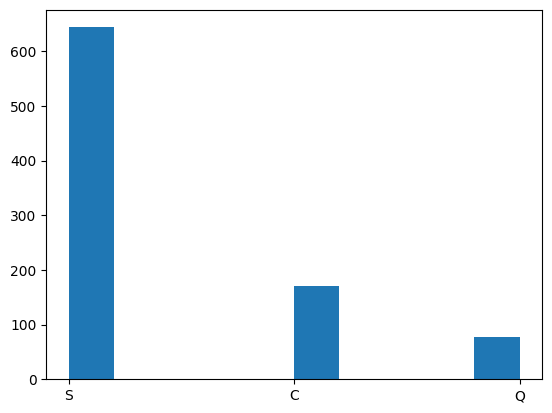

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data[['Embarked']].fillna("C"))
plt.show()


<Axes: ylabel='Age'>

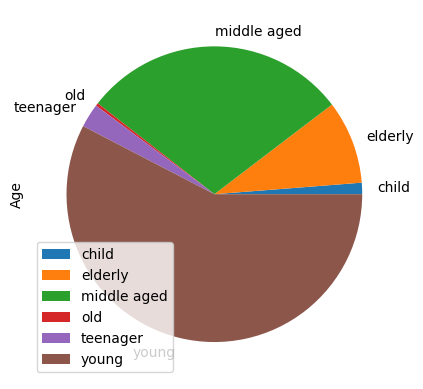

In [35]:
data.groupby(['Age_group']).sum().plot(kind='pie',y = "Age")

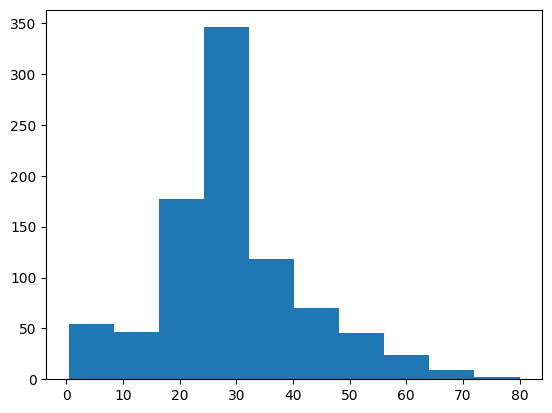

In [36]:
plt.hist(data[['Age']])
plt.show()

In [37]:
data2 = pd.read_csv("StudentsPerformance.csv")
data2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


[5.383245869828983, -7.959308005187657, -9.979557910004507]
[9.120185549328822e-08, 4.680538743933289e-15, 2.019877706867934e-22]


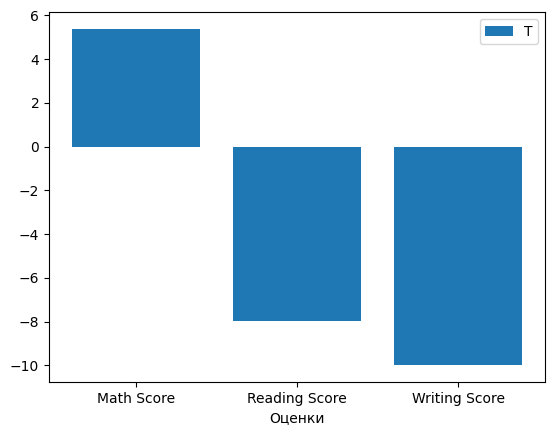

In [38]:
import numpy as np
from scipy.stats import ttest_ind

m = data2[data2['gender']=='male']
w = data2[data2['gender']=='female']

math_score = ttest_ind(m['math score'], w['math score'])
reading_score = ttest_ind(m['reading score'], w['reading score'])
writing_score = ttest_ind(m['writing score'], w['writing score'])

t_statistic = [math_score[0], reading_score[0], writing_score[0]]
p_values = [math_score[1], reading_score[1], writing_score[1]]

print(t_statistic)
print(p_values)

#plt.figure(figsize=(10, 1000))
plt.bar(['Math Score', 'Reading Score', 'Writing Score'], t_statistic, label = 'T') 
#plt.bar(['Math Score', 'Reading Score', 'Writing Score'], p_values, label = 'P') 
plt.xlabel("Оценки")

plt.legend() 
plt.show()